In [89]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import os
import pandas as pd
from pprint import pprint
import billboard
import matplotlib.pyplot as plt
import statistics
from scipy import stats

In [2]:
os.environ['SPOTIPY_CLIENT_ID']= input("Client ID: ")
os.environ['SPOTIPY_CLIENT_SECRET']= input("Client ID Secret: ")
os.environ['SPOTIPY_REDIRECT_URI']='http://www.berkeley.edu'

Client ID: 6e25e6e453ff466c80c82765a2068b50
Client ID Secret: 190b13a5959d43f3aeb15b20799a394b


In [3]:
chart = billboard.ChartData('hot-100')

pprint(chart)

billboard.ChartData('hot-100', date='2018-10-06')


In [4]:
chart[0]

billboard.ChartEntry(title='Girls Like You', artist='Maroon 5 Featuring Cardi B')

In [5]:
artist = []
top_songs =  []

for song in chart:
    artist.append(song.artist)
    top_songs.append(song.title)
    
pprint(top_songs)

['Girls Like You',
 'Lucid Dreams',
 'Better Now',
 'In My Feelings',
 'Killshot',
 'Sicko Mode',
 'I Like It',
 'FEFE',
 'I Love It',
 'Youngblood',
 'Taste',
 'Love Lies',
 'Falling Down',
 'Natural',
 'Happier',
 'Nonstop',
 'No Brainer',
 'Trip',
 'Back To You',
 'God Is A Woman',
 'Perfect',
 'Yes Indeed',
 "Boo'd Up",
 'New Patek',
 'Drip Too Hard',
 'Big Bank',
 'Eastside',
 'Lucky You',
 'Delicate',
 'Meant To Be',
 'Mo Bamba',
 'No Tears Left To Cry',
 'Sad!',
 'I Like Me Better',
 'Psycho',
 "I'm A Mess",
 'The Middle',
 'Wake Up In The Sky',
 'Nice For What',
 'Rap Devil',
 'Broken',
 'Simple',
 'Beautiful',
 'Tequila',
 "God's Plan",
 'High Hopes',
 'No Stylist',
 'She Got The Best Of Me',
 'Ring',
 'Hotel Key',
 'Drew Barrymore',
 'Blue Tacoma',
 'You Say',
 'Jackie Chan',
 'Africa',
 'Smile (Living My Best Life)',
 'Better',
 'Breathin',
 'Sunrise, Sunburn, Sunset',
 'Break Up In The End',
 'The Way I Am',
 'Lie',
 'Lose It',
 'Head Above Water',
 'W O R K I N  M E',
 'Me

In [6]:
artistname = []

for art in artist:
    if('Featuring' in art):
        art=art.split('Featuring')[0]
    if(',' in art):
        art=art.split(',')[0]
    if('&' in art):
        art=art.split('&')[0]
       
    if(art not in artistname):
        artistname.append(art.strip()) 
        
print(len(artistname))

84


In [7]:
username='alex.stanley89@gmail.com'
client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
scope = 'user-library-read playlist-read-private'
token = util.prompt_for_user_token(username, scope)
if token:
   sp = spotipy.Spotify(auth=token)
else:
   print("Can't get token for", username)

In [8]:
artistid=[]
artistidname={}
for name in artistname[:40]:
    try:
        artid=sp.search(q=name)['tracks']['items'][0]['album']['artists'][0]['id']
        artistid.append(artid)
        artistidname[artid]=name
        
    except Exception:
        print('Skipping')

Skipping


In [9]:
print(len(artistid))

39


In [10]:
# Get top 10 tracks for each artist in artist id

artist_track_ids = []
artist_song_names = []
artist_songpop = []
artist_name=[]

for ids in artistidname.keys():
    artistname=artistidname[ids]
    
    artist_top=sp.artist_top_tracks(artist_id=ids)['tracks']
    for song in artist_top:
        track_id = song['id']
        artist_name.append(artistname)
        track_name = song['name']
        popularity = song['popularity']
        artist_track_ids.append(track_id)
        artist_song_names.append(track_name)
        artist_songpop.append(popularity)
        
        print(f"Artist Name: {artistname}  Name: {track_name}|id: {track_id}|Popularity: {popularity}")

Artist Name: Maroon 5  Name: Girls Like You (feat. Cardi B)|id: 6V1bu6o1Yo5ZXnsCJU8Ovk|Popularity: 79
Artist Name: Maroon 5  Name: What Lovers Do (feat. SZA)|id: 2j5hsQvApottzvTn4pFJWF|Popularity: 78
Artist Name: Maroon 5  Name: She Will Be Loved - Radio Mix|id: 4llK75pXNWZz6KAho2Gp16|Popularity: 81
Artist Name: Maroon 5  Name: Sugar|id: 2iuZJX9X9P0GKaE93xcPjk|Popularity: 79
Artist Name: Maroon 5  Name: Maps|id: 4gbVRS8gloEluzf0GzDOFc|Popularity: 78
Artist Name: Maroon 5  Name: This Love|id: 6ECp64rv50XVz93WvxXMGF|Popularity: 78
Artist Name: Maroon 5  Name: Don't Wanna Know (feat. Kendrick Lamar)|id: 1nueTG77MzNkJTKQ0ZdGzT|Popularity: 73
Artist Name: Maroon 5  Name: Payphone|id: 1LmN9SSHISbtp9LoaR5ZVJ|Popularity: 71
Artist Name: Maroon 5  Name: Girls Like You|id: 6OEHjJJvdkk1Ln0p0AZdyz|Popularity: 72
Artist Name: Maroon 5  Name: Wait|id: 6AvfZXpbb6r35DfF7gHPRq|Popularity: 75
Artist Name: Lil Uzi Vert  Name: Lucid Dreams|id: 0s3nnoMeVWz3989MkNQiRf|Popularity: 97
Artist Name: Lil Uzi Ver

Artist Name: Tyga  Name: Taste (feat. Offset)|id: 5IaHrVsrferBYDm0bDyABy|Popularity: 96
Artist Name: Tyga  Name: SWISH|id: 55GiOwtxNajXVbpjjIzMnD|Popularity: 89
Artist Name: Tyga  Name: Dip|id: 2qfR91VvO7hRp4IajDT08h|Popularity: 77
Artist Name: Tyga  Name: Ayo|id: 0k6DnZMLoEUH8NGD5zh2SE|Popularity: 76
Artist Name: Tyga  Name: Ice Cream Man|id: 6ZA3Q8Dj5BrnmOsT300DCh|Popularity: 71
Artist Name: Tyga  Name: Leather in The Rain (feat. Kyndall)|id: 5lJAZ8IMBzfeWcV3PjCMMO|Popularity: 70
Artist Name: Tyga  Name: Sip A Lil (feat. Gucci Mane)|id: 6MPR32vGG1AaQMYOfqvyqx|Popularity: 68
Artist Name: Tyga  Name: Rack City|id: 0srwKuJPH8yBzzFUJMBQM2|Popularity: 68
Artist Name: Tyga  Name: Bitches N Marijuana|id: 3PiLfzEXHrvT1oJKR8PAJt|Popularity: 67
Artist Name: Tyga  Name: Swap Meet|id: 4bIFTZSKHZEMDUlEVF4ubu|Popularity: 67
Artist Name: Benny Blanco  Name: Eastside (with Halsey & Khalid)|id: 0d2iYfpKoM0QCKvcLCkBao|Popularity: 98
Artist Name: Benny Blanco  Name: Eastside (with Halsey & Khalid) - Ac

Artist Name: YG  Name: BIG BANK (feat. 2 Chainz, Big Sean, Nicki Minaj)|id: 0ZNrc4kNeQYD9koZ3KvCsy|Popularity: 88
Artist Name: YG  Name: That's My N**** (with Meek Mill, YG & Snoop Dogg)|id: 3i1B1PnsfnOQPGVIzhf1lr|Popularity: 74
Artist Name: YG  Name: HANDGUN (feat. A$AP Rocky)|id: 50wkDxcIfamIajKwmgp0iB|Popularity: 74
Artist Name: YG  Name: BULLETPROOF (feat. Jay 305)|id: 1qUdAB72nSWPZwDqH9KMYD|Popularity: 73
Artist Name: YG  Name: She Bad|id: 0CfmNX2TXk7yoJqHJiixnp|Popularity: 72
Artist Name: YG  Name: SUU WHOOP|id: 6JzvfFCIFT1CbbHE1pDNBU|Popularity: 72
Artist Name: YG  Name: POWER (feat. Ty Dolla $ign)|id: 4QL6NHf6sl3Sx58AFKc1GQ|Popularity: 72
Artist Name: YG  Name: TOO COCKY|id: 7GG1QIQ547taCwl1uLaTf5|Popularity: 70
Artist Name: YG  Name: 666 (feat. YoungBoy Never Broke Again)|id: 3R2fdTDtARC4xwKSG0rNWE|Popularity: 69
Artist Name: YG  Name: My Nigga|id: 02pf9lLM8Nb8l4u4ts1GWb|Popularity: 69
Artist Name: Taylor Swift  Name: Delicate|id: 6NFyWDv5CjfwuzoCkw47Xf|Popularity: 83
Artist N

Artist Name: Panic! At The Disco  Name: High Hopes|id: 1rqqCSm0Qe4I9rUvWncaom|Popularity: 91
Artist Name: Panic! At The Disco  Name: Say Amen (Saturday Night)|id: 76vMKwFtdDDCLcM6zXybjB|Popularity: 79
Artist Name: Panic! At The Disco  Name: Death Of A Bachelor|id: 1BECwm5qkaBwlbfo4kpYx8|Popularity: 78
Artist Name: Panic! At The Disco  Name: Hey Look Ma, I Made It|id: 22oEJW6r2rMb9z4IntfyEa|Popularity: 77
Artist Name: Panic! At The Disco  Name: This Is Gospel|id: 3yZQk5PC52CCmT4ZaTIKvv|Popularity: 76
Artist Name: Panic! At The Disco  Name: I Write Sins Not Tragedies|id: 4bPQs0PHn4xbipzdPfn6du|Popularity: 76
Artist Name: Panic! At The Disco  Name: Roaring 20s|id: 0wdV94AXGRphrbkDWLNzVC|Popularity: 76
Artist Name: Panic! At The Disco  Name: Emperor's New Clothes|id: 3px2rAPu74ltbkf9eZsZ8h|Popularity: 74
Artist Name: Panic! At The Disco  Name: King Of The Clouds|id: 50Hv5NZIM0puIUoBttjpfb|Popularity: 74
Artist Name: Panic! At The Disco  Name: Dying In LA|id: 18xmRkPWE0sGUzFyNNAAhN|Populari

In [11]:
pprint(sp.audio_features(tracks=artist_track_ids[0]))

[{'acousticness': 0.568,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6V1bu6o1Yo5ZXnsCJU8Ovk',
  'danceability': 0.851,
  'duration_ms': 235545,
  'energy': 0.541,
  'id': '6V1bu6o1Yo5ZXnsCJU8Ovk',
  'instrumentalness': 0,
  'key': 0,
  'liveness': 0.13,
  'loudness': -6.825,
  'mode': 1,
  'speechiness': 0.0505,
  'tempo': 124.959,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/6V1bu6o1Yo5ZXnsCJU8Ovk',
  'type': 'audio_features',
  'uri': 'spotify:track:6V1bu6o1Yo5ZXnsCJU8Ovk',
  'valence': 0.448}]


In [12]:
# Get audio analysis for artists' top tracks

song_energies = []
song_loudness = []
danceabilities = []
song_valences = []

data_split = 150

for track_id in artist_track_ids[:data_split]:
    response = sp.audio_features(tracks=track_id)[0]
    song_energies.append(response['energy'])
    song_loudness.append(response['loudness'])
    danceabilities.append(response['danceability'])
    song_valences.append(response['valence'])
    
print(len(song_valences))

retrying ...1secs
150


In [13]:
for track_id in artist_track_ids[data_split:]:
    response = sp.audio_features(tracks=track_id)[0]
    song_energies.append(response['energy'])
    song_loudness.append(response['loudness'])
    danceabilities.append(response['danceability'])
    song_valences.append(response['valence'])

In [14]:
print(len(song_valences))
print(len(artist_songpop))

309
309


In [15]:
songs_dict = {'Energy':song_energies,
            'Loudness':song_loudness,
            'Danceability':danceabilities,
            'Valence':song_valences,
            'Popularity':artist_songpop}

songs_df = pd.DataFrame(songs_dict)

songs_df.head()

,Energy,Loudness,Danceability,Valence,Popularity
0,0.541,-6.825,0.851,0.448,79
1,0.597,-5.131,0.799,0.419,78
2,0.667,-5.505,0.641,0.510,81
3,0.788,-7.055,0.748,0.884,79
4,0.713,-5.522,0.742,0.879,78


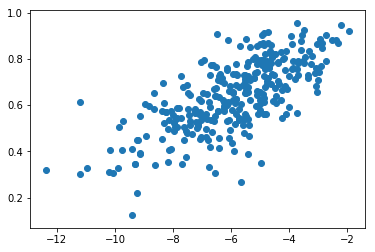

In [16]:
plt.scatter(x=songs_df['Loudness'],y=songs_df['Energy'])

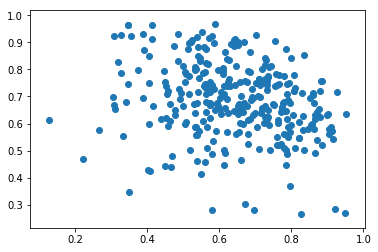

In [17]:
plt.scatter(x=songs_df['Energy'],y=songs_df['Danceability'])

Text(0, 0.5, 'Danceabiliity')

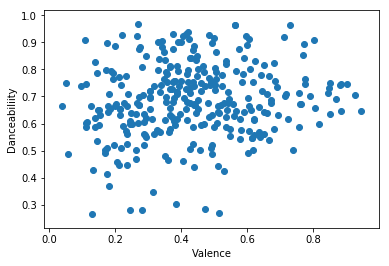

In [18]:
plt.scatter(x=songs_df['Valence'],y=songs_df['Danceability'])
plt.xlabel('Valence')
plt.ylabel("Danceabiliity")

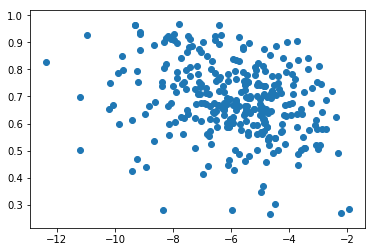

In [19]:
plt.scatter(x=songs_df['Loudness'],y=songs_df['Danceability'])

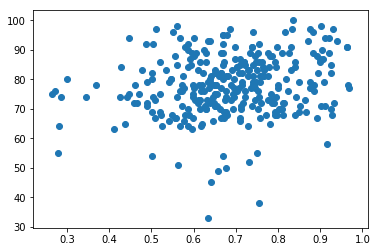

In [20]:
plt.scatter(x=songs_df['Danceability'],y=songs_df['Popularity'])

Text(0, 0.5, 'Popularity')

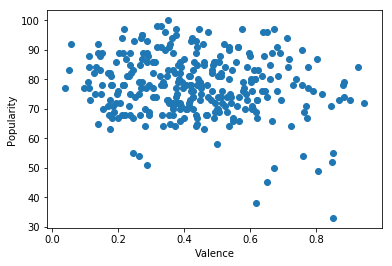

In [21]:
plt.scatter(x=songs_df['Valence'],y=songs_df['Popularity'])
plt.xlabel('Valence')
plt.ylabel("Popularity")

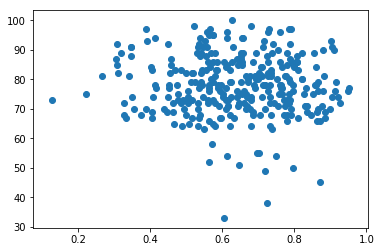

In [22]:
plt.scatter(x=songs_df['Energy'],y=songs_df['Popularity'])

In [23]:
worst_songs = sp.user_playlist_tracks(user='rancidswan99', playlist_id='3k2E7g0Cs7PFaSvv5SXOqM')



In [24]:
worst_ids=[]
for song in worst_songs:
    worst_ids.append(song['track']['id'])

TypeError: string indices must be integers

In [25]:
# Get song audio analysis
pprint(sp.audio_features(tracks='26EnBklrc1wBUgsVZ0RG8C'))

[None]


In [26]:
pprint(top_songs[0:50])

['Girls Like You',
 'Lucid Dreams',
 'Better Now',
 'In My Feelings',
 'Killshot',
 'Sicko Mode',
 'I Like It',
 'FEFE',
 'I Love It',
 'Youngblood',
 'Taste',
 'Love Lies',
 'Falling Down',
 'Natural',
 'Happier',
 'Nonstop',
 'No Brainer',
 'Trip',
 'Back To You',
 'God Is A Woman',
 'Perfect',
 'Yes Indeed',
 "Boo'd Up",
 'New Patek',
 'Drip Too Hard',
 'Big Bank',
 'Eastside',
 'Lucky You',
 'Delicate',
 'Meant To Be',
 'Mo Bamba',
 'No Tears Left To Cry',
 'Sad!',
 'I Like Me Better',
 'Psycho',
 "I'm A Mess",
 'The Middle',
 'Wake Up In The Sky',
 'Nice For What',
 'Rap Devil',
 'Broken',
 'Simple',
 'Beautiful',
 'Tequila',
 "God's Plan",
 'High Hopes',
 'No Stylist',
 'She Got The Best Of Me',
 'Ring',
 'Hotel Key']


In [27]:
top_song_id = []
for song_name in top_songs:
    song_id=sp.search(q=song_name, type='track')['tracks']['items'][0]['id']
    top_song_id.append(song_id)
    
pprint(top_song_id)

['6FRLCMO5TUHTexlWo8ym1W',
 '0s3nnoMeVWz3989MkNQiRf',
 '7dt6x5M1jzdTEt8oCbisTK',
 '2G7V7zsVDxg1yRsu7Ew9RJ',
 '1jo3TwNGCXfNdB5uba3ZVv',
 '2xLMifQCjDGFmkHkpNLD9h',
 '58q2HKrzhC3ozto2nDdN4z',
 '2E124GmJRnBJuXbTb4cPUB',
 '4S8d14HvHb70ImctNgVzQQ',
 '55S2PQgSMYAhgoTCcGCDfw',
 '5IaHrVsrferBYDm0bDyABy',
 '45Egmo7icyopuzJN0oMEdk',
 '0Dn40gxVCMo5TkgS8Ik18Q',
 '4zIO3ilp5HvTeK3HJHxhMP',
 '2dpaYNEQHiRxtZbfNsse99',
 '0TlLq3lA83rQOYtrqBqSct',
 '5WvAo7DNuPRmk4APhdPzi8',
 '7noud145AHZGg74vpWOsCa',
 '4hQ6UGyWQIGJmHSo0J88JW',
 '5OCJzvD7sykQEKHH7qAC3C',
 '0tgVpDi06FyKpA1z0VMD4v',
 '6vN77lE9LK6HP2DewaN6HZ',
 '0At2qAoaVjIwWNAqrscXli',
 '0Fpen1PTuEnCmOJtUU9Iud',
 '1BxkZE73h9BN3qwuA15TA3',
 '0ZNrc4kNeQYD9koZ3KvCsy',
 '0d2iYfpKoM0QCKvcLCkBao',
 '60SdxE8apGAxMiRrpbmLY0',
 '6NFyWDv5CjfwuzoCkw47Xf',
 '7iDa6hUg2VgEL1o1HjmfBn',
 '3QybPutx0Tjk472bBKjNWn',
 '2qT1uLXPVPzGgFOx4jtEuo',
 '3ee8Jmje8o58CHK66QrVC2',
 '1wjzFQodRWrPcQ0AnYnvQ9',
 '3swc6WTsr7rl9DqQKQA55C',
 '04ZTP5KsCypmtCmQg5tH9R',
 '09IStsImFySgyp0pIQdqAc',
 

In [43]:
# Simpler and faster to make a liist of JSON dctionaries and turn that into a pandas dataframe
test_list = []


for track_id in top_song_id:
    response = sp.audio_features(tracks=track_id)[0]
    test_list.append(response)

test_df = pd.DataFrame(test_list)
test_df.head(20)

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.56800,https://api.spotify.com/v1/audio-analysis/6FRL...,0.851,235545,0.541,6FRLCMO5TUHTexlWo8ym1W,0.000000,0,0.1300,-6.825,1,0.0505,124.959,4,https://api.spotify.com/v1/tracks/6FRLCMO5TUHT...,audio_features,spotify:track:6FRLCMO5TUHTexlWo8ym1W,0.448
1,0.34900,https://api.spotify.com/v1/audio-analysis/0s3n...,0.511,239836,0.566,0s3nnoMeVWz3989MkNQiRf,0.000000,6,0.3400,-7.230,0,0.2000,83.903,4,https://api.spotify.com/v1/tracks/0s3nnoMeVWz3...,audio_features,spotify:track:0s3nnoMeVWz3989MkNQiRf,0.218
2,0.35400,https://api.spotify.com/v1/audio-analysis/7dt6...,0.680,231267,0.563,7dt6x5M1jzdTEt8oCbisTK,0.000000,10,0.1360,-5.843,1,0.0454,145.028,4,https://api.spotify.com/v1/tracks/7dt6x5M1jzdT...,audio_features,spotify:track:7dt6x5M1jzdTEt8oCbisTK,0.374
3,0.05890,https://api.spotify.com/v1/audio-analysis/2G7V...,0.835,217925,0.626,2G7V7zsVDxg1yRsu7Ew9RJ,0.000060,1,0.3960,-5.833,1,0.1250,91.030,4,https://api.spotify.com/v1/tracks/2G7V7zsVDxg1...,audio_features,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,0.350
4,0.09890,https://api.spotify.com/v1/audio-analysis/1jo3...,0.892,253580,0.651,1jo3TwNGCXfNdB5uba3ZVv,0.000000,0,0.3710,-8.645,0,0.3780,105.814,4,https://api.spotify.com/v1/tracks/1jo3TwNGCXfN...,audio_features,spotify:track:1jo3TwNGCXfNdB5uba3ZVv,0.599
5,0.00513,https://api.spotify.com/v1/audio-analysis/2xLM...,0.834,312820,0.730,2xLMifQCjDGFmkHkpNLD9h,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,https://api.spotify.com/v1/tracks/2xLMifQCjDGF...,audio_features,spotify:track:2xLMifQCjDGFmkHkpNLD9h,0.446
6,0.09900,https://api.spotify.com/v1/audio-analysis/58q2...,0.816,253390,0.726,58q2HKrzhC3ozto2nDdN4z,0.000000,5,0.3720,-3.998,0,0.1290,136.048,4,https://api.spotify.com/v1/tracks/58q2HKrzhC3o...,audio_features,spotify:track:58q2HKrzhC3ozto2nDdN4z,0.650
7,0.08800,https://api.spotify.com/v1/audio-analysis/2E12...,0.931,179405,0.387,2E124GmJRnBJuXbTb4cPUB,0.000000,1,0.1360,-9.127,1,0.4120,125.978,4,https://api.spotify.com/v1/tracks/2E124GmJRnBJ...,audio_features,spotify:track:2E124GmJRnBJuXbTb4cPUB,0.376
8,0.01140,https://api.spotify.com/v1/audio-analysis/4S8d...,0.901,127947,0.522,4S8d14HvHb70ImctNgVzQQ,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,https://api.spotify.com/v1/tracks/4S8d14HvHb70...,audio_features,spotify:track:4S8d14HvHb70ImctNgVzQQ,0.329
9,0.01690,https://api.spotify.com/v1/audio-analysis/55S2...,0.596,203418,0.854,55S2PQgSMYAhgoTCcGCDfw,0.000000,7,0.1240,-5.114,0,0.4630,120.274,4,https://api.spotify.com/v1/tracks/55S2PQgSMYAh...,audio_features,spotify:track:55S2PQgSMYAhgoTCcGCDfw,0.152


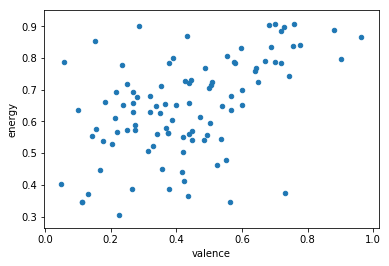

In [76]:
test_df.plot("valence", "energy", kind='scatter')

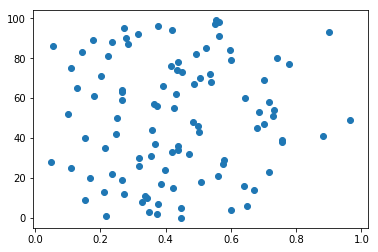

In [78]:
plt.scatter(test_df['valence'], test_df.index)

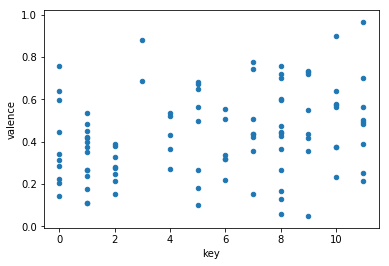

In [57]:
test_df.plot("key", "valence", kind='scatter')

In [101]:
top_keys = test_df.groupby('key').mean()
top_keys.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence
key,,,,,,,,,,,,
0,0.249970,0.733500,222644.000000,0.614900,0.000034,0.151510,-6.431700,0.900000,0.171400,130.931100,4.100,0.395600
1,0.130789,0.728214,223110.785714,0.517286,0.000142,0.191643,-7.276143,0.857143,0.192671,137.370643,4.000,0.328857
2,0.160050,0.612750,204750.125000,0.659750,0.000004,0.126150,-5.825625,0.875000,0.133625,109.056125,4.125,0.283500
3,0.229400,0.561000,200480.000000,0.861500,0.000000,0.097300,-3.285500,0.500000,0.072050,163.837000,4.000,0.784000
4,0.160544,0.690000,198880.600000,0.626600,0.000588,0.194140,-6.879200,0.200000,0.067480,128.597400,4.000,0.426800


<BarContainer object of 12 artists>

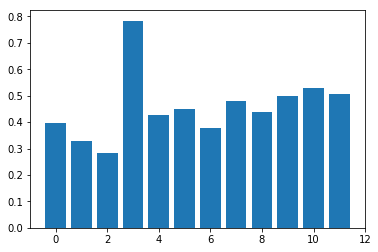

In [102]:
plt.bar(top_keys.index, top_keys.valence)

In [116]:
major_df = test_df[test_df['mode']==1]
# major_df = major_df.groupby('key').mean()
major_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.56800,https://api.spotify.com/v1/audio-analysis/6FRL...,0.851,235545,0.541,6FRLCMO5TUHTexlWo8ym1W,0.000000,0,0.1300,-6.825,1,0.0505,124.959,4,https://api.spotify.com/v1/tracks/6FRLCMO5TUHT...,audio_features,spotify:track:6FRLCMO5TUHTexlWo8ym1W,0.4480
2,0.35400,https://api.spotify.com/v1/audio-analysis/7dt6...,0.680,231267,0.563,7dt6x5M1jzdTEt8oCbisTK,0.000000,10,0.1360,-5.843,1,0.0454,145.028,4,https://api.spotify.com/v1/tracks/7dt6x5M1jzdT...,audio_features,spotify:track:7dt6x5M1jzdTEt8oCbisTK,0.3740
3,0.05890,https://api.spotify.com/v1/audio-analysis/2G7V...,0.835,217925,0.626,2G7V7zsVDxg1yRsu7Ew9RJ,0.000060,1,0.3960,-5.833,1,0.1250,91.030,4,https://api.spotify.com/v1/tracks/2G7V7zsVDxg1...,audio_features,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,0.3500
5,0.00513,https://api.spotify.com/v1/audio-analysis/2xLM...,0.834,312820,0.730,2xLMifQCjDGFmkHkpNLD9h,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,https://api.spotify.com/v1/tracks/2xLMifQCjDGF...,audio_features,spotify:track:2xLMifQCjDGFmkHkpNLD9h,0.4460
7,0.08800,https://api.spotify.com/v1/audio-analysis/2E12...,0.931,179405,0.387,2E124GmJRnBJuXbTb4cPUB,0.000000,1,0.1360,-9.127,1,0.4120,125.978,4,https://api.spotify.com/v1/tracks/2E124GmJRnBJ...,audio_features,spotify:track:2E124GmJRnBJuXbTb4cPUB,0.3760
8,0.01140,https://api.spotify.com/v1/audio-analysis/4S8d...,0.901,127947,0.522,4S8d14HvHb70ImctNgVzQQ,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,https://api.spotify.com/v1/tracks/4S8d14HvHb70...,audio_features,spotify:track:4S8d14HvHb70ImctNgVzQQ,0.3290
10,0.02360,https://api.spotify.com/v1/audio-analysis/5IaH...,0.884,232959,0.559,5IaHrVsrferBYDm0bDyABy,0.000000,0,0.1010,-7.442,1,0.1200,97.994,4,https://api.spotify.com/v1/tracks/5IaHrVsrferB...,audio_features,spotify:track:5IaHrVsrferBYDm0bDyABy,0.3420
11,0.09560,https://api.spotify.com/v1/audio-analysis/45Eg...,0.708,201707,0.648,45Egmo7icyopuzJN0oMEdk,0.000000,6,0.1340,-5.626,1,0.0449,143.955,4,https://api.spotify.com/v1/tracks/45Egmo7icyop...,audio_features,spotify:track:45Egmo7icyopuzJN0oMEdk,0.3380
13,0.21600,https://api.spotify.com/v1/audio-analysis/4zIO...,0.448,189467,0.612,4zIO3ilp5HvTeK3HJHxhMP,0.000000,2,0.0800,-6.106,1,0.0708,97.773,4,https://api.spotify.com/v1/tracks/4zIO3ilp5HvT...,audio_features,spotify:track:4zIO3ilp5HvTeK3HJHxhMP,0.2130
14,0.19100,https://api.spotify.com/v1/audio-analysis/2dpa...,0.687,214290,0.792,2dpaYNEQHiRxtZbfNsse99,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,https://api.spotify.com/v1/tracks/2dpaYNEQHiRx...,audio_features,spotify:track:2dpaYNEQHiRxtZbfNsse99,0.6710


<BarContainer object of 70 artists>

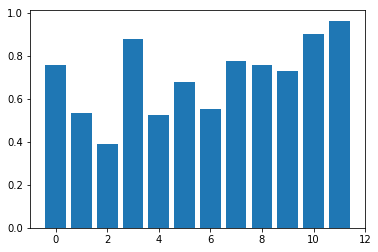

In [119]:
plt.bar(major_df['key'], major_df['valence'])

In [128]:
Cmaj = major_df[major_df['key']==0]
# Csharp

key_data=[]
for key in range(0,12):
    key_df = major_df[major_df['key']==key]
    key_data.append(key_df['valence'])


In [129]:
print(key_data)

[0     0.448
10    0.342
16    0.639
39    0.756
71    0.203
81    0.224
83    0.144
87    0.286
92    0.315
Name: valence, dtype: float64, 3     0.350
7     0.376
19    0.268
25    0.112
59    0.266
72    0.535
73    0.449
75    0.112
76    0.418
88    0.237
89    0.177
94    0.420
Name: valence, dtype: float64, 8     0.329
13    0.213
42    0.249
66    0.391
90    0.280
95    0.274
96    0.378
Name: valence, dtype: float64, 41    0.881
Name: valence, dtype: float64, 85    0.523
Name: valence, dtype: float64, 14    0.671
45    0.681
52    0.100
61    0.182
63    0.268
Name: valence, dtype: float64, 11    0.338
18    0.508
99    0.555
Name: valence, dtype: float64, 15    0.422
36    0.437
44    0.357
70    0.507
74    0.436
77    0.778
80    0.742
Name: valence, dtype: float64, 5     0.4460
20    0.1680
32    0.4730
34    0.4390
38    0.7570
55    0.4270
57    0.3640
64    0.2670
79    0.6000
84    0.5960
86    0.0564
Name: valence, dtype: float64, 33    0.419
51    0.728
54    0.732
5

In [134]:
stats.f_oneway(key_data[0],key_data[-1])

F_onewayResult(statistic=4.958488251303191, pvalue=0.04587688112640743)